In [ ]:
# !pip install hopsworks

In [ ]:
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
plt.rcParams["axes.labelsize"] = 14.
plt.rcParams["xtick.labelsize"] = 12.
plt.rcParams["ytick.labelsize"] = 12.
plt.rcParams["legend.fontsize"] = 10.

In [ ]:
import hopsworks
import pandas as pd

In [140]:
project = hopsworks.login()
fs = project.get_feature_store()

In [ ]:
wine_df = pd.read_csv('https://raw.githubusercontent.com/ID2223KTH/id2223kth.github.io/master/assignments/lab1/wine.csv')
wine_df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
wine_df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

### Data Preprocessing

In [ ]:
wine_df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [ ]:
wine_df.dropna()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Exploratory Data Analysis (EDA)  our Wine Data

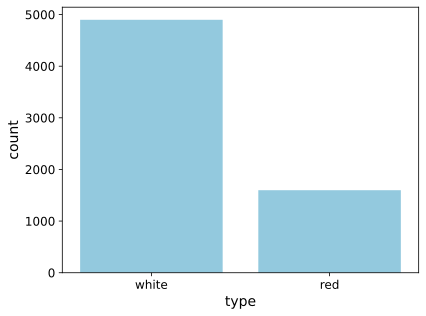

In [ ]:
sns.countplot(wine_df, x='type', color='skyblue')
plt.show();

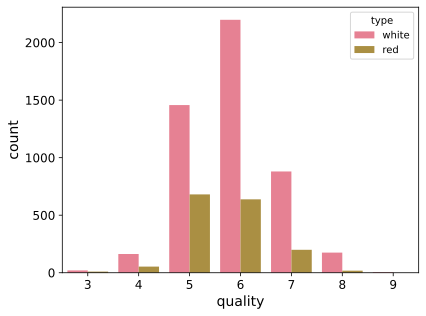

In [ ]:
sns.countplot(x='quality', hue='type', data=wine_df)
plt.show();

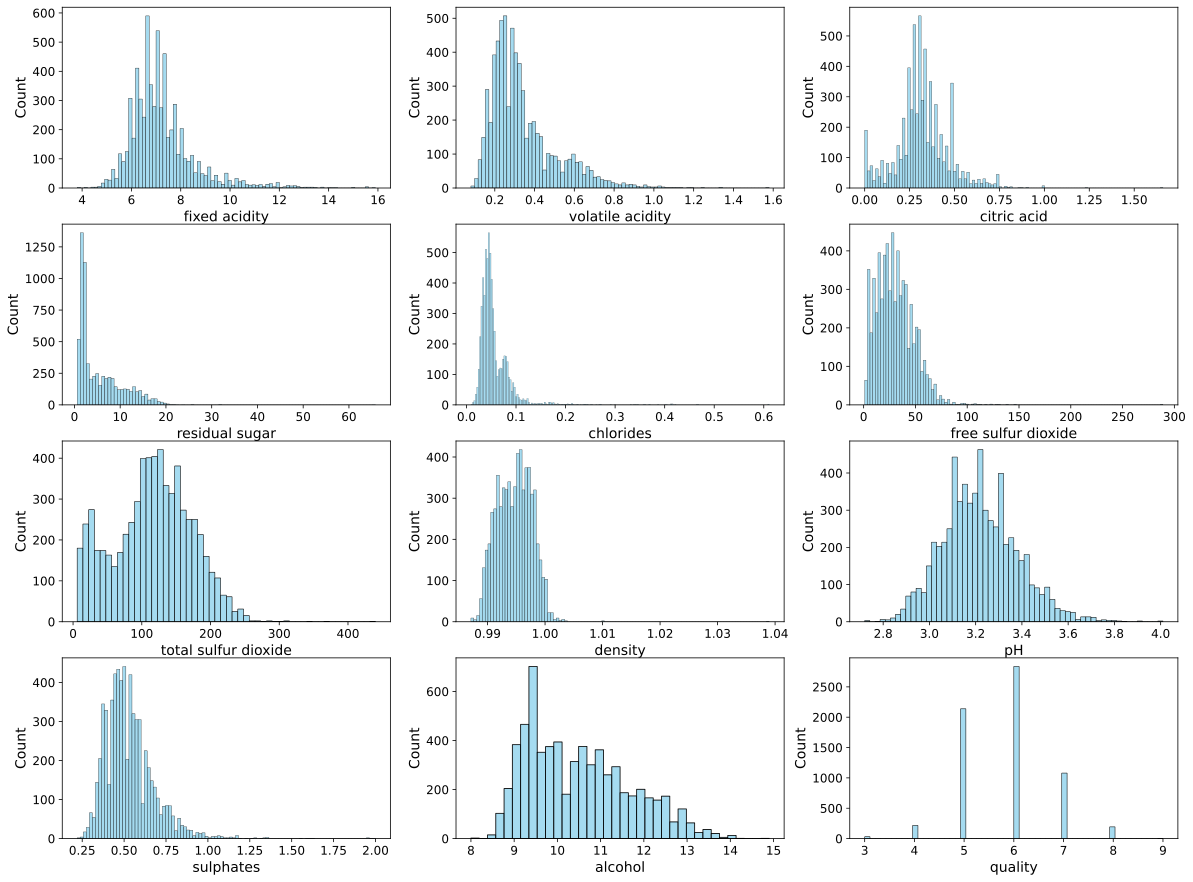

In [ ]:
fig, axes = plt.subplots(4, 3, figsize=(20, 15))
for ax, feature in zip(axes.flat, wine_df.columns[1:]):
    sns.histplot(wine_df[feature], color='skyblue', ax=ax)
plt.show();

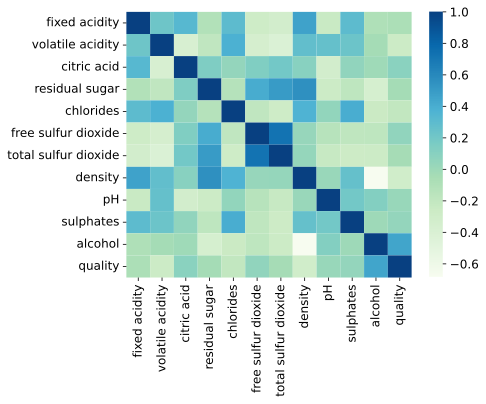

In [ ]:
sns.heatmap(wine_df.select_dtypes(include='number').corr(), cmap='GnBu');

In [ ]:
wine_df[wine_df['quality'] == 3].min(0)[1:-1]

fixed acidity              4.2
volatile acidity          0.17
citric acid                0.0
residual sugar             0.7
chlorides                0.022
free sulfur dioxide        3.0
total sulfur dioxide       9.0
density                 0.9911
pH                        2.87
sulphates                 0.28
alcohol                    8.0
dtype: object

In [ ]:
min_constraints, max_constraints = {}, {}
for quality in range(3, 10):
    for feature in wine_df.columns[1:-1]:
        min_constraints[quality] = wine_df[wine_df['quality'] == quality].min(0).tolist()[1:-1]
        max_constraints[quality] = wine_df[wine_df['quality'] == quality].max(0).tolist()[1:-1]

In [ ]:
min_constraints

{3: [4.2, 0.17, 0.0, 0.7, 0.022, 3.0, 9.0, 0.9911, 2.87, 0.28, 8.0],
 4: [4.6, 0.11, 0.0, 0.7, 0.013, 3.0, 7.0, 0.9892, 2.74, 0.25, 8.4],
 5: [4.5, 0.1, 0.0, 0.6, 0.009, 2.0, 6.0, 0.98722, 2.79, 0.27, 8.0],
 6: [3.8, 0.08, 0.0, 0.7, 0.015, 1.0, 6.0, 0.98758, 2.72, 0.23, 8.4],
 7: [4.2, 0.08, 0.0, 0.9, 0.012, 3.0, 7.0, 0.98711, 2.84, 0.22, 8.6],
 8: [3.9, 0.12, 0.03, 0.8, 0.014, 3.0, 12.0, 0.98713, 2.88, 0.25, 8.5],
 9: [6.6, 0.24, 0.29, 1.6, 0.018, 24.0, 85.0, 0.98965, 3.2, 0.36, 10.4]}

In [ ]:
max_constraints

{3: [11.8, 1.58, 0.66, 16.2, 0.267, 289.0, 440.0, 1.0008, 3.63, 0.86, 12.6],
 4: [12.5, 1.13, 1.0, 17.55, 0.61, 138.5, 272.0, 1.001, 3.9, 2.0, 13.5],
 5: [15.9, 1.33, 1.0, 23.5, 0.611, 131.0, 344.0, 1.00315, 3.79, 1.98, 14.9],
 6: [14.3, 1.04, 1.66, 65.8, 0.415, 112.0, 294.0, 1.03898, 4.01, 1.95, 14.0],
 7: [15.6, 0.915, 0.76, 19.25, 0.358, 108.0, 289.0, 1.0032, 3.82, 1.36, 14.2],
 8: [12.6, 0.85, 0.74, 14.8, 0.121, 105.0, 212.5, 1.0006, 3.72, 1.1, 14.0],
 9: [9.1, 0.36, 0.49, 10.6, 0.035, 57.0, 139.0, 0.997, 3.41, 0.61, 12.9]}

### Insert our Iris DataFrame into a FeatureGroup

In [ ]:
primary_key = ['type', 'fixed_acidity', 'volatile_acidity', 'citric_acid',
               'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
               'total_sulfur_dioxide', 'density', 'ph', 'sulphates', 'alcohol']
wine_df = wine_df.rename(
    columns={feature: primary_key[i]
             for i, feature in enumerate(wine_df.columns[:-1])}
)
wine_fg = fs.get_or_create_feature_group(
    name="wine",
    version=1,
    primary_key=primary_key,
    description="Wine quality dataset")
wine_fg.insert(wine_df)

Index(['type', 'fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'ph', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')
Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/217236/fs/217155/fg/237921


Uploading Dataframe: 0.00% |          | Rows 0/6497 | Elapsed Time: 00:00 | Remaining Time: ?

Launching job: wine_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/217236/jobs/named/wine_1_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x7fa0f6577040>, None)

### Data Validation

In [ ]:
from great_expectations.core import ExpectationSuite, ExpectationConfiguration

def expect(suite, column, min_val, max_val):
    suite.add_expectation(
    ExpectationConfiguration(
        expectation_type="expect_column_values_to_be_between",
        kwargs={
            "column":column,
            "min_value":min_val,
            "max_value":max_val,
        }
    )
)

In [ ]:
suite = ExpectationSuite(expectation_suite_name="wine_dimensions")


suite.add_expectation(
    ExpectationConfiguration(
        expectation_type="expect_column_values_to_be_in_set",
        kwargs={
            'column': 'type',
            'value_set': ['red', 'white']
        }
    )
)

min_vals, max_vals = wine_df.min(0), wine_df.max(0)
for i in range(1, wine_df.shape[1] - 1):
    expect(suite, wine_df.columns[i], min_vals[i], max_vals[i])
expect(suite, 'quality', 0, 10)
wine_fg.save_expectation_suite(expectation_suite=suite, validation_ingestion_policy="STRICT")

Attached expectation suite to Feature Group, edit it at https://c.app.hopsworks.ai:443/p/217236/fs/217155/fg/237921
